In [1]:
from datetime import datetime
import requests
import pandas as pd

In [2]:
TICKER = "aapl"
TOKEN_ID = "pk_18e0f666b37842b2b7b9bdd4d677bc1e"

In [3]:
ydata = requests.get(f"https://cloud.iexapis.com/stable/stock/{TICKER}/chart/1y?token={TOKEN_ID}").json()
ydf = pd.DataFrame(ydata).iloc[:,:2]
ydf["minute"] = "09:30"
ydf.head()

,date,open,minute
0,2019-10-07,56.57,09:30
1,2019-10-08,56.46,09:30
2,2019-10-09,56.76,09:30
3,2019-10-10,56.98,09:30
4,2019-10-11,58.24,09:30


In [4]:
mdata = requests.get(f"https://cloud.iexapis.com/stable/stock/{TICKER}/chart/1mm?token={TOKEN_ID}").json()
mdf = pd.DataFrame(mdata).iloc[:,:4].drop(["label"], axis=1)
mdf.head()

,date,minute,open
0,2020-09-08,09:30,114.235
1,2020-09-08,10:00,117.300
2,2020-09-08,10:30,118.005
3,2020-09-08,11:00,116.725
4,2020-09-08,11:30,117.175


In [5]:
d5data = requests.get(f"https://cloud.iexapis.com/stable/stock/{TICKER}/chart/5dm?token={TOKEN_ID}").json()
d5df = pd.DataFrame(d5data).iloc[:,:4].drop(["label"], axis=1)
d5df.head()

,date,minute,open
0,2020-10-01,09:30,117.65
1,2020-10-01,09:40,116.76
2,2020-10-01,09:50,116.69
3,2020-10-01,10:00,116.34
4,2020-10-01,10:10,116.56


In [6]:
ddata = requests.get(f"https://cloud.iexapis.com/stable/stock/{TICKER}/chart/1d?token={TOKEN_ID}").json()
ddf = pd.DataFrame(ddata).iloc[:,:6].drop(["label", "low", "high"], axis=1)
ddf.head()

,date,minute,open
0,2020-10-07,09:30,114.64
1,2020-10-07,09:31,114.56
2,2020-10-07,09:32,114.76
3,2020-10-07,09:33,114.65
4,2020-10-07,09:34,114.98


In [7]:
idata = requests.get(f"https://cloud.iexapis.com/stable/stock/{TICKER}/intraday-prices/batch?token={TOKEN_ID}").json()
idf = pd.DataFrame(idata).iloc[:,:6].drop(["label", "low", "high"], axis=1)
idf.head()

,date,minute,open
0,2020-10-07,09:30,114.64
1,2020-10-07,09:31,114.56
2,2020-10-07,09:32,114.76
3,2020-10-07,09:33,114.65
4,2020-10-07,09:34,114.98


In [8]:
merged_df = pd.merge(pd.merge(pd.merge(pd.merge(ddf, idf, how='outer'), d5df, how='outer'), mdf, how='outer'), ydf, how='outer')
merged_df.head()

,date,minute,open
0,2020-10-07,09:30,114.64
1,2020-10-07,09:31,114.56
2,2020-10-07,09:32,114.76
3,2020-10-07,09:33,114.65
4,2020-10-07,09:34,114.98


In [9]:
data = merged_df

In [10]:
data.isna().sum()

date      0
minute    0
open      0
dtype: int64

In [11]:
stamps = []
for index, row in data.iterrows():
    date, time = row['date'], row['minute']
    year, month, day = date.split("-")
    hour, minute = time.split(":")
    stamps.append(datetime(int(year),int(month),int(day),int(hour),int(minute)).timestamp())
    
data["timestamp"]=stamps

In [12]:
pd.options.display.float_format = '{:.1f}'.format

data = data.drop(['date', 'minute'], axis=1).sort_values(by=['timestamp'])

In [13]:
data

,open,timestamp
767,56.6,1570440600.0
768,56.5,1570527000.0
769,56.8,1570613400.0
770,57.0,1570699800.0
771,58.2,1570786200.0
...,...,...
385,115.2,1602086100.0
386,115.1,1602086160.0
387,115.2,1602086220.0
388,115.2,1602086280.0


In [14]:
data['timestamp'].unique().shape

(999,)

In [15]:
for i, (index, row) in enumerate(data[data.duplicated(subset=['timestamp'],keep=False)].iterrows()):
    if i%2 == 1:
      data = data.drop(index=index)

In [16]:
data

,open,timestamp
767,56.6,1570440600.0
768,56.5,1570527000.0
769,56.8,1570613400.0
770,57.0,1570699800.0
771,58.2,1570786200.0
...,...,...
385,115.2,1602086100.0
386,115.1,1602086160.0
387,115.2,1602086220.0
388,115.2,1602086280.0


In [17]:
data=data.reindex(columns=["timestamp", "open"])
data.head()

,timestamp,open
767,1570440600.0,56.6
768,1570527000.0,56.5
769,1570613400.0,56.8
770,1570699800.0,57.0
771,1570786200.0,58.2


In [21]:
data = data.reset_index().drop(["index"], axis=1)

In [22]:
data.head()

,timestamp,open
0,1570440600.0,56.6
1,1570527000.0,56.5
2,1570613400.0,56.8
3,1570699800.0,57.0
4,1570786200.0,58.2


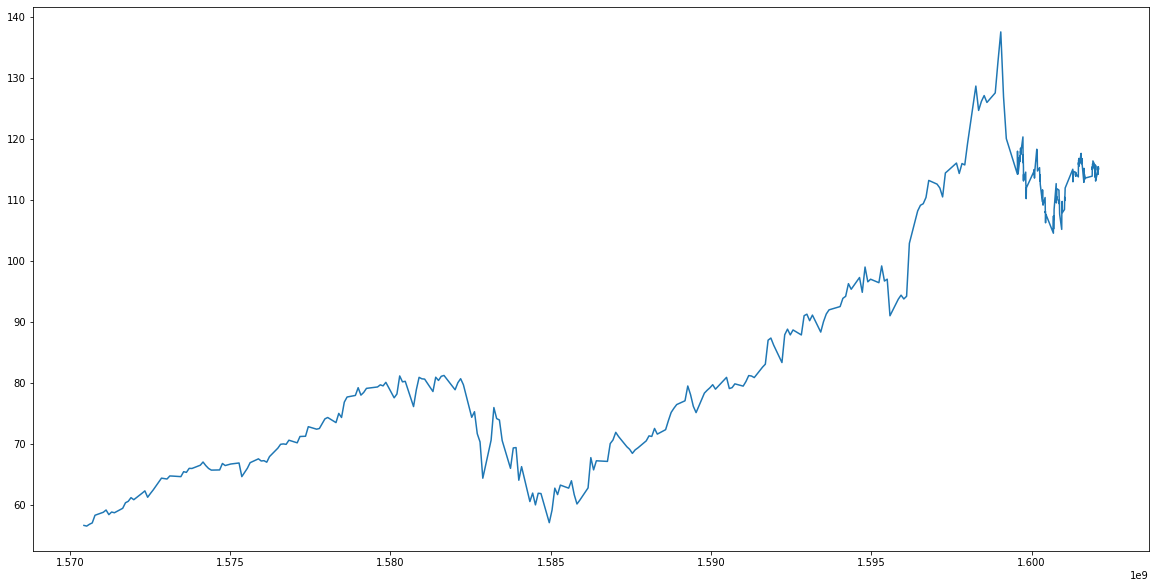

In [30]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(20,10))
plt.plot(data["timestamp"].values, data["open"].values)
plt.show()